In [1]:
# Package imports

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# ML related imports
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# Functions related to creation and plotting

def mandelbrot(c, max_iter):
    z = 0
    for i in range(max_iter):
        z = z * z + c
        if abs(z) > 2:
            return i
    return max_iter

def plot_mandelbrot(x_min, x_max, y_min, y_max, width, height, max_iter):
    img = np.zeros((width, height))
    for x in tqdm(range(width)):
        for y in range(height):
            real = x_min + (x_max - x_min) * x / width
            imag = y_min + (y_max - y_min) * y / height
            c = complex(real, imag)
            img[x, y] = mandelbrot(c, max_iter)

    plt.imshow(img.T, origin='lower', extent=(x_min, x_max, y_min, y_max), cmap='hot')
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.title('Mandelbrot Set')
    plt.show()

100%|██████████| 800/800 [00:29<00:00, 26.78it/s] 


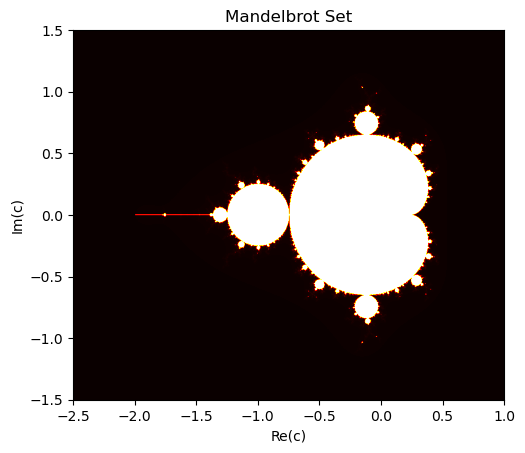

In [4]:
# Creating the plot

# Set the parameters for the plot
x_min, x_max = -2.5, 1
y_min, y_max = -1.5, 1.5
width, height = 800, 800 #These can be taken also as measures of resolution
max_iter = 1000

# Generate and plot the Mandelbrot set
plot_mandelbrot(x_min, x_max, y_min, y_max, width, height, max_iter)

In [37]:
# Defining the neural network, and other similar function for training

# Set the random seed for reproducibility. Should do for later work
#torch.manual_seed(42)
#np.random.seed(42)

# Generate boundary points on the Mandelbrot set
def generate_boundary_points(num_points, width, height, max_iter):
    #percentage = 0.9
    img = np.zeros((width, height))
    boundary_points = []
    for x in range(width):
        for y in range(height):
            real = x_min + (x_max - x_min) * x / width
            imag = y_min + (y_max - y_min) * y / height
            c = complex(real, imag)
            escape_time = mandelbrot(c, max_iter)
            if escape_time == max_iter - 1:
                boundary_points.append([real, imag])
    boundary_points = np.array(boundary_points)
    #num_points = int(percentage * len(boundary_points))
    indices = np.random.choice(len(boundary_points), num_points, replace=True) #the change to True was made recently. Alternatively change sample size?
    return boundary_points[indices]

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define a similar NN with batch normalisation included
class NeuralNetworkBN(nn.Module):
    def __init__(self):
        super(NeuralNetworkBN, self).__init__()
        self.fc1 = nn.Linear(2, 16)

# Define the training function
def train_model(model, data, num_epochs, learning_rate):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    for epoch in range(num_epochs):
        model.train()
        inputs = torch.Tensor(data)
        targets = torch.Tensor(data)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}')

In [40]:
# Parameters for training and model creation

num_epochs = 2000
learning_rate = 0.001
num_points = 10000
num_pred = 10000

width = 800
height = 800
max_iter = 100

In [ ]:
# Creating and plotting a neural network. Note that at the moment loss is not well recorded

# Generate boundary points on the Mandelbrot set
boundary_points = generate_boundary_points(num_points, width, height, max_iter)

# Create the neural network model
model = NeuralNetwork()

# Train the model
train_model(model, boundary_points, num_epochs, learning_rate)

# Generate points on the boundary for plotting
plot_points = generate_boundary_points(num_points)

# Convert the points to tensors and pass them through the trained model
input_points = torch.Tensor(plot_points)
predicted_points = model(input_points).detach().numpy()

# Plot the predicted points and the original boundary points
plt.scatter(boundary_points[:, 0], boundary_points[:, 1], color='blue', label='Original Boundary')
plt.scatter(predicted_points[:, 0], predicted_points[:, 1], color='red', label='Predicted Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting the Boundary of the Mandelbrot Set')
plt.legend()
plt.show()

In [ ]:
### Testing methods of generating boundary points. The current method is inadequate

In [8]:
def gen_boundary_points_test(num_points, width, height, max_iter):
    #percentage = 0.9
    img = np.zeros((width, height))
    boundary_points = []
    for x in range(width):
        for y in range(height):
            real = x_min + (x_max - x_min) * x / width
            imag = y_min + (y_max - y_min) * y / height
            c = complex(real, imag)
            escape_time = mandelbrot(c, max_iter)
            if escape_time == max_iter - 1:
                boundary_points.append([real, imag])
    boundary_points = np.array(boundary_points)
    print(boundary_points)
    #num_points = int(percentage * len(boundary_points))
    indices = np.random.choice(len(boundary_points), num_points, replace=True) #the change to True was made recently. Alternatively change sample size?
    return boundary_points[indices]

In [ ]:
boundary_points = gen_boundary_points_test(10000, 800, 800, 100)

print(boundary_points)

In [49]:
print(len(generate_boundary_points(100, 800, 800, 100)))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
x =  21
x =  20
x =  19
x =  18
x =  17
x =  16
x =  15
x =  14
x =  13
x =  12
x =  11
x =  10
x =  9
x =  8
x =  7
x =  6
x =  5
x =  4
x =  3
x =  2
x =  1
x =  0
x =  -1
x =  403
x =  404
x =  178
x =  177
x =  176
x =  175
x =  174
x =  173
x =  172
x =  171
x =  170
x =  169
x =  168
x =  167
x =  166
x =  165
x =  164
x =  163
x =  162
x =  161
x =  160
x =  159
x =  158
x =  157
x =  156
x =  155
x =  154
x =  153
x =  152
x =  151
x =  150
x =  149
x =  148
x =  147
x =  146
x =  145
x =  144
x =  143
x =  142
x =  141
x =  140
x =  139
x =  138
x =  137
x =  136
x =  135
x =  134
x =  133
x =  132
x =  131
x =  130
x =  129
x =  128
x =  127
x =  126
x =  125
x =  124
x =  123
x =  122
x =  121
x =  120
x =  119
x =  118
x =  117
x =  116
x =  115
x =  114
x =  113
x =  112
x =  111
x =  706
x =  707
x =  708
x =  709
x = 

In [47]:
# Generate boundary points on the Mandelbrot set
def generate_boundary_points(num_points, width, height, max_iter):
    escape_times = np.zeros((width, height))
    max_escape_time = max_iter - 1

    for x in range(width):
        for y in range(height):
            real = x_min + (x_max - x_min) * x / (width - 1)
            imag = y_min + (y_max - y_min) * y / (height - 1)
            c = complex(real, imag)
            z = c
            escape_time = 0

            while escape_time < max_iter and abs(z) <= 2:
                z = z * z + c
                escape_time += 1

            escape_times[x, y] = escape_time
            
    print(escape_times)
    boundary_points = []

    for _ in range(num_points):
        angle = np.random.uniform(0, 2 * np.pi)
        x = int(width / 2 + (width / 2 - 1) * np.cos(angle))
        y = int(height / 2 + (height / 2 - 1) * np.sin(angle))

        #print(f"x = ", x, "and y = ", y)

        max_val = 0
        max_point = None

        dx = int(np.sign(np.cos(angle)))
        dy = int(np.sign(np.sin(angle)))
        
        while x >= 0 and x < width and y >= 0 and y < height:
            if escape_times[x, y] == max_escape_time:
                val = abs(x_min + (x_max - x_min) * x / width + 1j * (y_min + (y_max - y_min) * y / height))
                print(f"val = ", val)
                if val > max_val:
                    max_val = val
                    max_point = [x_min + (x_max - x_min) * x / width, y_min + (y_max - y_min) * y / height]

            x += dx
            print(f"x = ", x)
            y += dy

        if max_point is not None:
            boundary_points.append(max_point)

    return np.array(boundary_points)

In [50]:
def mandelbrot_boundary(num_points):
    points = []
    max_iterations = 1000  # Maximum number of iterations for the Mandelbrot algorithm

    for x in range(-2, 2):
        for y in range(-2, 2):
            cx = x / 2.0
            cy = y / 2.0
            c = complex(cx, cy)
            z = complex(0, 0)

            for i in range(max_iterations):
                z = z * z + c

                if abs(z) > 2:
                    points.append((cx, cy))
                    break

                if i == max_iterations - 1:
                    points.append((cx, cy))

                cx += 0.01

    return points[:num_points]

In [55]:
num_points = 1000  # Number of points to generate
boundary_points = mandelbrot_boundary(num_points)
print(boundary_points)
for point in boundary_points:
    print(point)

plt.scatter(boundary_points, color='blue', label='Original Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting the Boundary of the Mandelbrot Set')
plt.legend()
plt.show()

[(-0.98, -1.0), (-0.96, -0.5), (8.989999999999855, 0.0), (-0.96, 0.5), (-0.47, -1.0), (9.489999999999842, -0.5), (9.489999999999842, 0.0), (9.489999999999842, 0.5), (9.989999999999831, -1.0), (9.989999999999831, -0.5), (9.989999999999831, 0.0), (9.989999999999831, 0.5), (0.51, -1.0), (0.54, -0.5), (0.54, 0.0), (0.54, 0.5)]
(-0.98, -1.0)
(-0.96, -0.5)
(8.989999999999855, 0.0)
(-0.96, 0.5)
(-0.47, -1.0)
(9.489999999999842, -0.5)
(9.489999999999842, 0.0)
(9.489999999999842, 0.5)
(9.989999999999831, -1.0)
(9.989999999999831, -0.5)
(9.989999999999831, 0.0)
(9.989999999999831, 0.5)
(0.51, -1.0)
(0.54, -0.5)
(0.54, 0.0)
(0.54, 0.5)


TypeError: scatter() missing 1 required positional argument: 'y'

In [92]:
#import numpy as np

def mandelbrot_boundary(num_points):
    points = []
    max_iterations = 1000  # Maximum number of iterations for the Mandelbrot algorithm

    for i in range(num_points):
        angle = 2 * np.pi * i / num_points
        cx = 0.0
        cy = 0.0
        c = complex(cx, cy)
        z = complex(cx, cy)

        for j in range(max_iterations):
            if abs(z) > 2:
                points.append((cx, cy))
                break

            z = z * z + c

            cx += 0.01 * np.cos(angle)  # Update cx with the increment
            cy += 0.01 * np.sin(angle)  # Update cy with the increment
            
    return points

'''
        for j in range(max_iterations):
            cx += 0.01 * np.cos(angle)  # Update cx with the increment
            cy += 0.01 * np.sin(angle)  # Update cy with the increment
            
            z = z * z + c
            
            if abs(z) > 2:
                points.append((cx, cy))
                break

            if j == max_iterations - 1:
                points.append((z.real, z.imag))  # Append the current values of z.real and z.imag

    return points
    '''

'\n        for j in range(max_iterations):\n            cx += 0.01 * np.cos(angle)  # Update cx with the increment\n            cy += 0.01 * np.sin(angle)  # Update cy with the increment\n            \n            z = z * z + c\n            \n            if abs(z) > 2:\n                points.append((cx, cy))\n                break\n\n            if j == max_iterations - 1:\n                points.append((z.real, z.imag))  # Append the current values of z.real and z.imag\n\n    return points\n    '

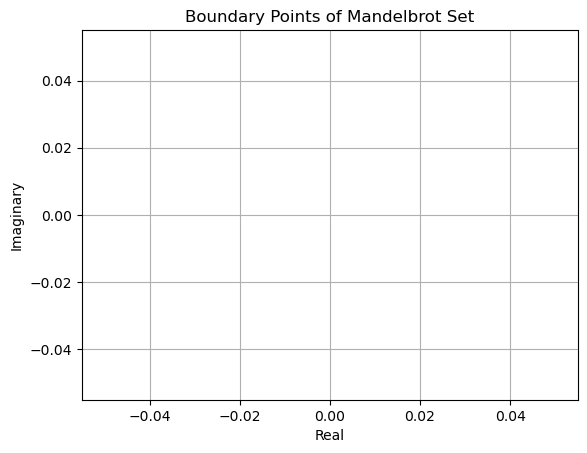

In [93]:
num_points = 100  # Number of points to generate
boundary_points = mandelbrot_boundary(num_points)

#for point in boundary_points:
#    print(point)

def plot_mandelbrot_boundary(points):
    x_values = [point[0] for point in points]
    y_values = [point[1] for point in points]

    plt.scatter(x_values, y_values, s=5, c='black')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Boundary Points of Mandelbrot Set')
    plt.grid(True)
    plt.show()

# Plot the boundary points
plot_mandelbrot_boundary(boundary_points)